In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

### Задача 1
Примените алгоритм Metropolis для генерации выборки из распределения с плотностью 
p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

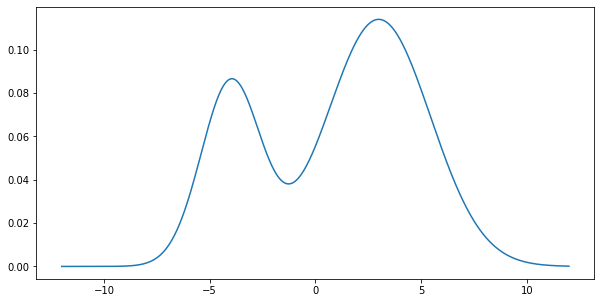

In [3]:
x = np.linspace(-12, 12, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

fig, ax = plt.subplots(1, figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')
plt.plot(x, y)
plt.show()

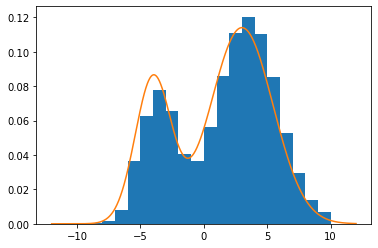

In [4]:
def value(x):
  return 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

def proposal(x):
    return x + np.random.choice([-1, 1])


post = metroplis(0, value, proposal, 10000)

                                          
plt.hist (post, bins=np.arange(22) - 11, density=True)
plt.plot(x, y)
plt.show()

### Задача 2
Рассмотрим граф $G=(V,E)$, вершинам которого случайным образом приписаны значения 0 и 1 так, что смежные вершины не могут одновременно иметь значение 1. Пример допустимой расстановки значений по вершинам графа показан на картинке ниже (черные вершины имеют значение 1, белые - 0):

<!-- ![img](http://www.mathematik.uni-ulm.de/stochastik/lehre/ss06/markov/skript_engl/bild4.jpg) -->

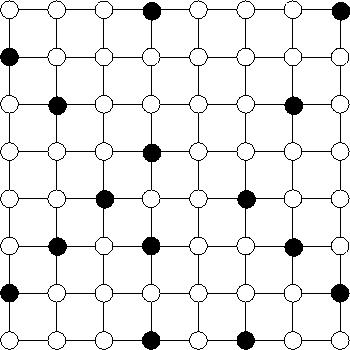

Как оценить, сколько в среднем закрашенных вершин будет иметь такой граф?

Сформулируем задачу в математических терминах.

Пусть $\xi \in \{0,1\}^{V}$ обозначает конфигурацию графа (расстановку 0 и 1 по вершинам). Назовем конфигурацию допустимой, если вершины, соединенные ребрами, не имеют одновременно значения 1. Пусть $Z_G$ - общее количество допустимых конфигураций. Зададим  распределение на множестве всех $2^V$ конфигураций:
$$\begin{equation*}
\mu(\xi) = 
 \begin{cases}
   \frac{1}{Z_G}, &\text{$\xi$ - допустимая конфигурация}\\
   0, &\text{иначе.}
 \end{cases}
\end{equation*}$$
Обозначим $n(\xi)$ - число закрашенных вершин в конфигурации $\xi$. Тогда
$$
{\rm E} n(\xi) = \sum\limits_{x \in \{0,1\}^V} n(x) \mu(x) = \frac{1}{Z_G} \sum\limits_{x \in \{0,1\}^V} n(x) {\rm I}_{\{x - \text{допустимая} \}}
$$

Явно перебирать все $x \in \{0,1\}^{V}$ не представляется возможным. Мы могли бы попробовать оценить ${\rm E} n(\xi)$, используя закон больших чиcел:
$$
{\rm E} n(\xi) \approx \frac{1}{N} \sum\limits_{i=1}^{N} n(\xi_i), \text{где $\xi_i$, $i=1,...,N$ - выборка случайных допустимых графов. }
$$

Для моделирования выборки можно применить метод MCMC:
* выбираем случайную вершину
* пробуем заменить в ней цвет. Если заменить можно - заменяем с вероятностью 0.5. Если нет - выбираем новую вершину.

Задание
* Оценить  ${\rm E} n(\xi)$ для графа 10х10
* Построить график распределеиня $n(\xi)$

In [16]:
def MCMCstep(graph, dim):
  x, y = np.random.randint(dim, size = 2)
  if(graph[x, y] == 1):
    if(np.random.randint(2)):  
      graph[x, y] = 0

  if(graph[x, y] == 0):
    if(graph[max(x - 1, 0), y] == 0 and graph[min(x + 1, dim - 1), y] == 0 and graph[x, max(y - 1, 0)] == 0 and graph[x, min(y + 1, dim - 1)] == 0): 
      if(np.random.randint(2)): 
        graph[x, y] = 1

  return graph


dim = 10
Graph = np.zeros((dim, dim))
sample = []
for i in range(10 ** 6): 
  Graph = MCMCstep(Graph, dim)
  sample += [Graph.sum()]

print(np.mean(sample))

29.887145


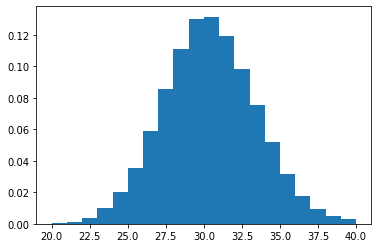

In [25]:
plt.hist(sample, bins = 20, density = True, range = (20,40), histtype = 'barstacked')
plt.show()